In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
conn = sqlite3.connect('movies.db')
c = conn.cursor()

In [8]:
movies = pd.read_sql_query("select * from movies;", conn)
movies.head()

,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year
0,tt4633694,Spider-Man: Into the Spider-Verse,PG,189936471.0,8.5,87.0,117.0,160975.0,2018
1,tt1477834,Aquaman,PG-13,334826690.0,7.2,55.0,143.0,211622.0,2018
2,tt7959026,The Mule,R,103804407.0,7.1,58.0,116.0,32910.0,2018
3,tt6966692,Green Book,PG-13,84068561.0,8.3,69.0,130.0,158958.0,2018
4,tt1727824,Bohemian Rhapsody,PG-13,215983200.0,8.1,49.0,134.0,311167.0,2018


In [9]:
genres = pd.read_sql_query("select * from genres;", conn)
genres.head()

,id,genre
0,0,War
1,1,Western
2,2,Animation
3,3,Thriller
4,4,Adventure


In [10]:
movie_genres = pd.read_sql_query("select * from movie_genres;", conn)
movie_genres.head()

,genre_id,movie_id
0,2,tt4633694
1,12,tt4633694
2,4,tt4633694
3,12,tt1477834
4,4,tt1477834


In [11]:
tmdb_ids = pd.read_sql_query("select * from tmdb_ids;", conn)
tmdb_ids.head()

,imdb_id,tmdb_id,original_lang,overview,popularity,release_date,title,vote_avg,vote_count
0,tt7547158,460082,ja,Girls killed by evil boys come back from hell ...,0.600,2018-11-28,GHOST SQUAD,0.0,0
1,tt9537008,586005,en,"Gini aka Ganesh, a cab driver meets a passenge...",0.600,,Gini Helida Kathe,0.0,0
2,tt8451712,543493,en,When two couples with mixed feelings about hav...,1.481,2019-02-02,Babysplitters,0.0,0
3,tt8866064,553082,ar,A number of obstacles stands in the way of a y...,0.840,2018-08-20,10 Days Before the Wedding,0.0,0
4,tt7996170,542719,en,Wilfred Owen returns to the Somme against the ...,0.600,,The Burying Party,0.0,0


In [68]:
imdb_tmdb = pd.read_sql_query('''SELECT * FROM tmdb_ids
                  INNER JOIN movies
                  ON tmdb_ids.imdb_id = movies.imdb_id''', conn)

imdb_tmdb.head()

,imdb_id,tmdb_id,original_lang,overview,popularity,release_date,title,vote_avg,vote_count,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year
0,tt7547158,460082,ja,Girls killed by evil boys come back from hell ...,0.600,2018-11-28,GHOST SQUAD,0.0,0,tt7547158,Gôsuto sukuwaddo,None,NaN,10.0,NaN,106.0,393,2018
1,tt9537008,586005,en,"Gini aka Ganesh, a cab driver meets a passenge...",0.600,,Gini Helida Kathe,0.0,0,tt9537008,Gini Helida Kathe,None,NaN,10.0,NaN,138.0,407,2019
2,tt8451712,543493,en,When two couples with mixed feelings about hav...,1.481,2019-02-02,Babysplitters,0.0,0,tt8451712,Babysplitters,Not Rated,NaN,9.6,NaN,119.0,66,2019
3,tt8866064,553082,ar,A number of obstacles stands in the way of a y...,0.840,2018-08-20,10 Days Before the Wedding,0.0,0,tt8866064,10 Days Before the Wedding,None,NaN,9.5,NaN,120.0,337,2018
4,tt7996170,542719,en,Wilfred Owen returns to the Somme against the ...,0.600,,The Burying Party,0.0,0,tt7996170,The Burying Party,None,NaN,9.4,NaN,60.0,37,2018


In [18]:
junction = pd.read_sql_query('''SELECT genre, certificate, imdb_rating FROM genres
                  LEFT JOIN movie_genres
                  ON movie_genres.genre_id = genres.id
                  LEFT JOIN movies
                  ON movies.imdb_id = movie_genres.movie_id
                  GROUP BY genre, certificate''', conn)

junction.head()

,genre,certificate,imdb_rating
0,Action,None,NaN
1,Action,Approved,NaN
2,Action,G,5.7
3,Action,Not Rated,5.6
4,Action,PG,NaN


In [25]:
junction.shape

(196, 3)

In [36]:
certificates = pd.read_sql_query('''SELECT certificate, imdb_rating FROM genres
                  LEFT JOIN movie_genres
                  ON movie_genres.genre_id = genres.id
                  LEFT JOIN movies
                  ON movies.imdb_id = movie_genres.movie_id
                  GROUP BY certificate''', conn)

certificates

,certificate,imdb_rating
0,None,NaN
1,Approved,NaN
2,E10+,NaN
3,G,5.6
4,M,NaN
5,Not Rated,5.9
6,Open,NaN
7,PG,5.1
8,PG-13,5.4
9,R,6.7


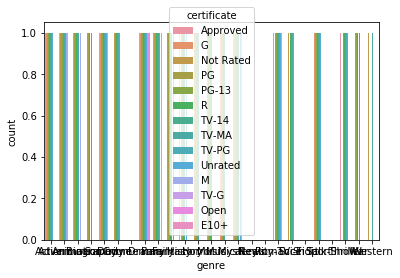

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x="genre", hue="certificate", data=junction)

In [56]:
heatmap_data = pd.DataFrame(index=genres['genre'], columns=certificates['certificate'])
heatmap_data

for i in range(junction.shape[0]):
    genr = junction.iloc[i]['genre']
    cert = junction.iloc[i]['certificate']
    imdb = junction.iloc[i]['imdb_rating']
    
    heatmap_data.at[genr,cert] = imdb
    
heatmap_data = heatmap_data.fillna(0)
heatmap_data

certificate,None,Approved,E10+,G,M,Not Rated,Open,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,Unrated
genre,,,,,,,,,,,,,,,
War,0.0,0.0,0,0.0,0,5.9,0,0.0,5.4,6.7,0.0,0.0,6.9,0.0,0.0
Western,0.0,0.0,0,0.0,0,6.3,0,0.0,0.0,6.5,0.0,0.0,4.5,0.0,0.0
Animation,0.0,0.0,0,5.6,0,5.0,0,5.1,7.1,7.8,5.6,2.7,6.6,7.9,0.0
Thriller,7.0,0.0,0,0.0,0,4.6,0,0.0,6.8,7.3,4.9,0.0,5.4,5.7,0.0
Adventure,0.0,0.0,0,5.6,0,6.5,0,4.2,7.6,6.5,4.7,5.3,4.7,7.1,1.7
Sci-Fi,5.6,0.0,0,0.0,0,7.0,0,0.0,6.8,4.6,4.9,0.0,5.4,5.3,1.7
Biography,8.5,0.0,0,0.0,0,7.1,0,7.4,5.4,7.3,0.0,0.0,7.1,0.0,0.0
Sport,7.4,0.0,0,5.5,0,7.5,0,6.4,6.2,4.7,8.4,0.0,7.8,4.9,4.7
Reality-TV,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


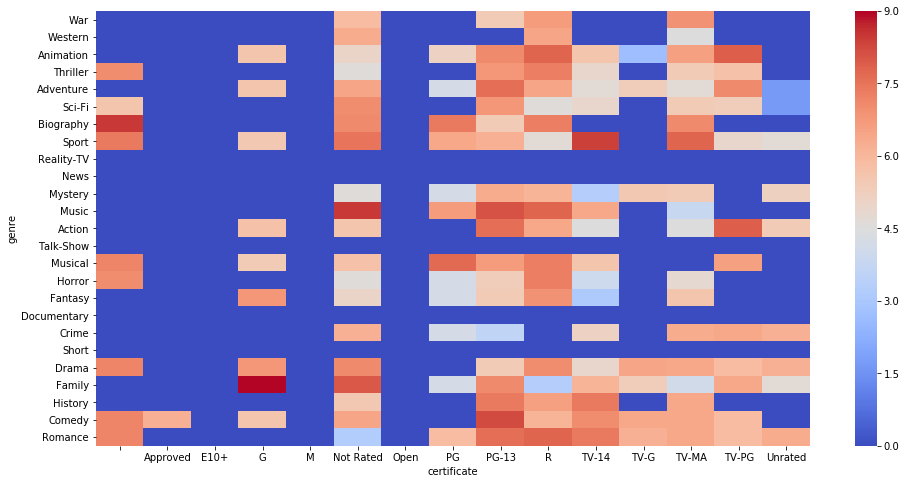

In [66]:
plt.figure(figsize=(16, 8))
ay = sns.heatmap(heatmap_data, cmap='coolwarm')